# Predict and verify task completion times

## Experiment Design

For this experiment our aim was to determine our own custom klm values for experienced users of a calculator app and then test, how well these hold up when predicting tasks for the aformentioned calculator. To evaluate our predictions, we compare their performance to predictions using the standard values introduced by Card et al.
Our main research goal is to determine if calculating your own KLM values befoe predicting task times is worth it.

### KLM Values

Before starting our experiment, we calculated all standard klm values, excluding the m value, by running different test for each.
The calculation process and an explanation for each test, can be viewed at the calculator_klm notebook.
We came to the follwing values:
- k = 0.309
- b = 0.09
- h = 0.498
- p = 0.421

In comparison, the values presented by card et. al are:
- k = 0.28
- b = 0.1
- h = 0.4
- p = 1.1

As can be seen, most of the values are ver similar. Only the p (pointing) value was much smaller for our own operators, which makes sense, because the size of the calculator app is much smaller than an entire screen.

### Test Setup

For our experiments, we predicted and then tested the task times for 4 different calculator oparations. These were:
- adding the numbers from 1 to 20 using only the mouse
- adding the numbers from 1 to 20 using only the keyboard
- calculating the result of $(3^2 + 4^2) * 15.2$ using only the mouse.
- calculating the result of $(3^2 + 4^2) * 15.2$ using only the keyboard

For the later two the actual opearations were "$ 3*3 + 4*4 = * 15.2 =$" as our calculator app could not square numbers and didn't have parentheses as inputs.
For each of those tasks we first created a list of klm operators, mapping the needed inputs (these lists can be viewed at klm1.txt, klm2.txt ..), and then used these to predict the task times with our own values and the values of Card et al. As we did not want to measure any mental operations, we excluded these from our operator lists.
For the experiment itself we had our participants do each of the tasks as fast as they can. To mitigate the effect of mental operations as much as possible, the participants were allowed to do each task multiple times until they were able to perform them without having to think much on their inputs. As errors would influence the test results, the participants also had to do each task until they were able to do it without any errors. 
Standard confounding variables like fatigue or learning should not really affect task times, as participants could repeat each task multiple times until they felt comfortable doing the inputs. Therefore, we did not utilize any form of counter balancing for these effects.

### Variables

Independent variables: tasks

Dependent variables: task completion time

Controlled variables: input device (laptop keyboard, mouse), screen resolution, screen size environment, klm operators list

Possible confounding variables: mental effect, errors



### Participants

For our experiment we had two participants who were the same people hat designed this test and the calculator app. Normally this would seem highly questionable but we feel that it is acceptable for our case, as we wanted to test task times for experienced users without measuring any mental operations. Having participants who are very familiar with the app and the test setup seems helpful for mitigating the effects of mental operations.
Both participants are male and between 20 and 30 years old. As we wanted some more test data, each participant did each task twice, resulting in 4 task times for each task.

In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt 

In [3]:
# copied methods from klm.py script

def file_to_klm_string(filename):
    klm_string = ""
    try:
        file = open(filename)
    except IOError:
        return []
    lines = file.readlines()
    for line in lines:
        new_line = line.split("#", 1)[0].replace(" ","").rstrip().lower()
        klm_string += new_line
    return klm_string


# calculates task time
def calculate_klm_time(klm_model, klm_string):
    numbers = ""
    result = 0
    for char in klm_string:
        # save digits as prefixes for following operator
        if char.isdigit():
            numbers += char
        else:
            try:
                operator_number = klm_model[char]
            except KeyError:
                print(char, ' character does not match any klm operator. Check your klm file.')
                return
            # multiply by prefixed number if it exists
            if len(numbers) > 0:
                operator_number *= float(numbers)
                numbers = ""
            result += operator_number
    return result

In [4]:
klm_lit = {
            "k": 0.28,
            "p": 1.1,
            "h": 0.4,
            "b": 0.1,
            "m": 1.35,
            }
klm_own = {
            "k": 0.309,
            "b": 0.09,
            "h": 0.498,
            "p": 0.421,
            }

In [5]:
predictions_dict_own = {}
predictions_dict_own["test1"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm1.txt")), 3)
predictions_dict_own["test2"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm2.txt")), 3)
predictions_dict_own["test3"] = round(calculate_klm_time(klm_own, file_to_klm_string("klm3.txt")), 3)
predictions_dict_own["test4"] =  round(calculate_klm_time(klm_own, file_to_klm_string("klm4.txt")), 3)

# Predicted Times for own KLM Values

In [6]:
predictions_dict_own

{'test1': 30.651, 'test2': 15.759, 'test3': 8.414, 'test4': 4.326}

In [7]:
predictions_dict_lit = {}
predictions_dict_lit["test1"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm1.txt")), 3)
predictions_dict_lit["test2"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm2.txt")), 3)
predictions_dict_lit["test3"] = round(calculate_klm_time(klm_lit, file_to_klm_string("klm3.txt")), 3)
predictions_dict_lit["test4"] =  round(calculate_klm_time(klm_lit, file_to_klm_string("klm4.txt")), 3)

# Predicted Times for Card et al. KLM Values

In [8]:
predictions_dict_lit

{'test1': 66.3, 'test2': 14.28, 'test3': 18.2, 'test4': 3.92}

## Test results

In [9]:
time_mouse_1 = []
time_key_1 = []
time_mouse_2 = []
time_key_2 = []

for i in range (1, 5):  
    mouse_1 = pd.read_csv("test_data/test1_{num}.csv".format(num = i), names=["input","time"])
    key_1 = pd.read_csv("test_data/test2_{num}.csv".format(num = i), names=["input","time"])
    mouse_2 = pd.read_csv("test_data/test3_{num}.csv".format(num = i), names=["input","time"])
    key_2 = pd.read_csv("test_data/test4_{num}.csv".format(num = i), names=["input","time"])
    
    time_diff_mouse_1 = (list(mouse_1["time"])[-1]-list(mouse_1["time"])[0])
    time_diff_key_1 = (list(key_1["time"])[-1]-list(key_1["time"])[0])
    time_diff_mouse_2 = (list(mouse_2["time"])[-1]-list(mouse_2["time"])[0])
    time_diff_key_2 = (list(key_2["time"])[-1]-list(key_2["time"])[0])
    
    time_mouse_1.append(time_diff_mouse_1)
    time_key_1.append(time_diff_key_1)
    time_mouse_2.append(time_diff_mouse_2)
    time_key_2.append(time_diff_key_2)

time_mouse_1_result = round(sum(time_mouse_1)/len(time_mouse_1),3)
time_key_1_result = round(sum(time_key_1)/len(time_key_1),3)
time_mouse_2_result = round(sum(time_mouse_2)/len(time_mouse_2),3)
time_key_2_result = round(sum(time_key_2)/len(time_key_2),3)

time_key_2_result

6.709

# List predictions and actual mean task time

In [10]:
results = [["1", time_mouse_1_result, predictions_dict_lit["test1"],predictions_dict_own["test1"]],
            ["2", time_key_1_result, predictions_dict_lit["test2"],predictions_dict_own["test2"]],
             ["3", time_mouse_2_result, predictions_dict_lit["test3"],predictions_dict_own["test3"]],
              ["4", time_key_2_result, predictions_dict_lit["test4"], predictions_dict_own["test4"]]]

df = pd.DataFrame(results, columns = ['Task','Tested','Estimated (Card et. al)','Estimated (own)'])
print(df)

  Task  Tested  Estimated (Card et. al)  Estimated (own)
0    1  29.212                    66.30           30.651
1    2  14.536                    14.28           15.759
2    3   9.569                    18.20            8.414
3    4   6.709                     3.92            4.326


### Boxplot Task 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Task 1: predicted and tested task completion time')

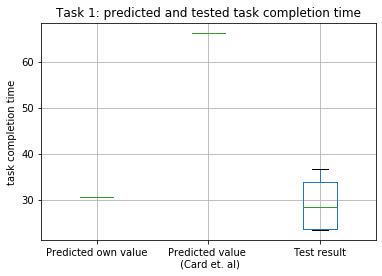

In [11]:
pred_time = [predictions_dict_lit["test1"]]
pred_time_own = [predictions_dict_own["test1"]]


df = pd.DataFrame(time_mouse_1, columns=['Test result'])
df2 = pd.DataFrame(pred_time, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(ylabel="task completion time")
plt.title("Task 1: predicted and tested task completion time")

### Boxplot Task 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Task 2: predicted and tested task completion time')

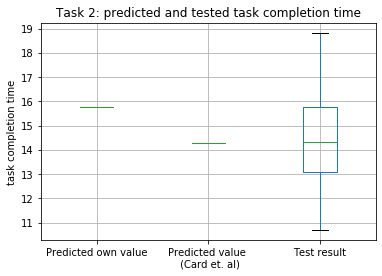

In [12]:
pred_time_2 = [predictions_dict_lit["test2"]]
pred_time_own_2 = [predictions_dict_own["test2"]]


df = pd.DataFrame(time_key_1, columns=['Test result'])
df2 = pd.DataFrame(pred_time_2, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own_2, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(ylabel="task completion time")
plt.title("Task 2: predicted and tested task completion time")

### Boxplot Task 3

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Task 3: predicted and tested task completion time')

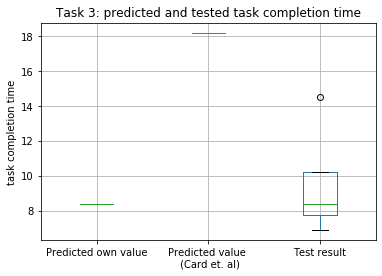

In [14]:
pred_time_3 = [predictions_dict_lit["test3"]]
pred_time_own_3 = [predictions_dict_own["test3"]]


df = pd.DataFrame(time_mouse_2, columns=['Test result'])
df2 = pd.DataFrame(pred_time_3, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own_3, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(ylabel="task completion time")
plt.title("Task 3: predicted and tested task completion time")

### Boxplot Task 4

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Task 4: predicted and tested task completion time')

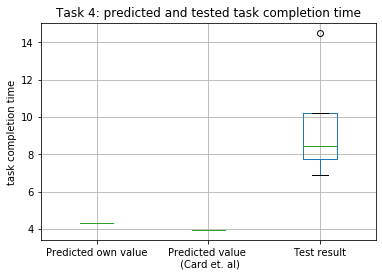

In [15]:
pred_time_4 = [predictions_dict_lit["test4"]]
pred_time_own_4 = [predictions_dict_own["test4"]]


df = pd.DataFrame(time_mouse_2, columns=['Test result'])
df2 = pd.DataFrame(pred_time_4, columns=["Predicted value \n (Card et. al)"])
df3 = pd.DataFrame(pred_time_own_4, columns=["Predicted own value"])


cdf = pd.concat([df, df2, df3])    


boxplot_1 = cdf.boxplot()
boxplot_1.set(ylabel="task completion time")
plt.title("Task 4: predicted and tested task completion time")

# Results

Our results show, that all of our predicted times except for task 4 came very close to the actual mean task times. In 3/4 cases our times were also closer predictions, than the standard times presented by card et al. Especially our smaller value for the pointing operator seems to have benefitted our predictions. This is probably due to the small size of the calculator app. We are unsure, why our predicitons for task 4 fared far wworse than the others, though the most probable cause seems to be a stronger mental effect when performing the task.
In conclusion it can be said, that termining your own app-specific KLM values can be very helpful for calculating task times, as it can lead to much better predictions